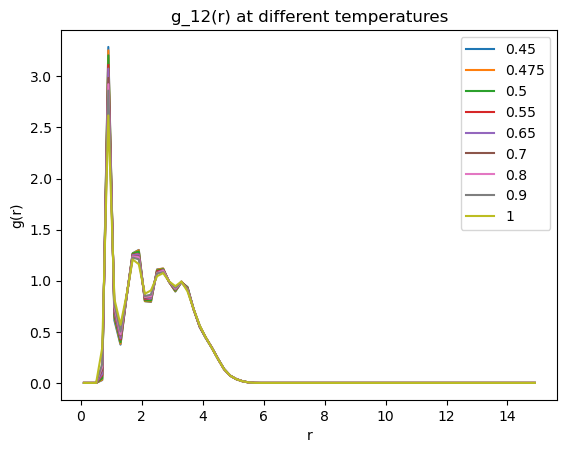

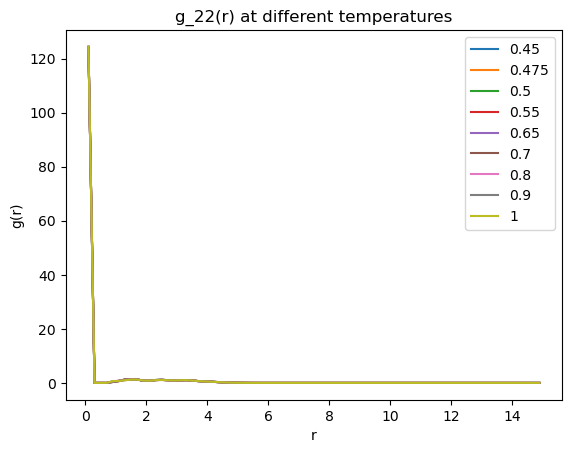

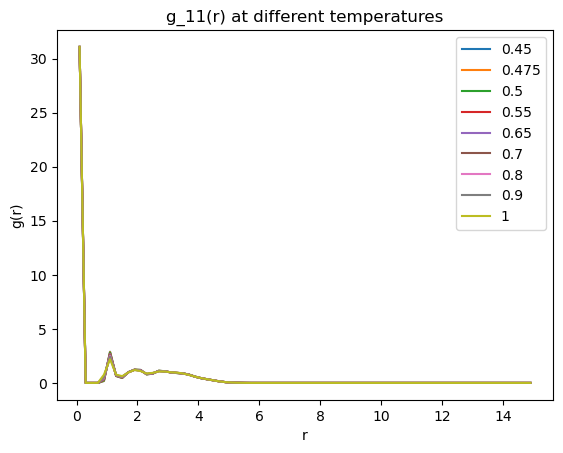

In [60]:
#use md analysis to analze the trajectory
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.analysis.msd as msd
import matplotlib.pyplot as plt
import glob
import numpy as np


traj_files = [
    'kalj_T0475_n360_v300_prod_30000000_1.unwrap.dcd',
    'kalj_T0500_n360_v300_prod_10000000_1.unwrap.dcd',
    'kalj_T0550_n360_v300_prod_3000000_1.unwrap.dcd',
    'kalj_T0650_n360_v300_prod_350000_1.unwrap.dcd',
    'kalj_T0700_n360_v300_prod_180000_1.unwrap.dcd',
    'kalj_T0800_n360_v300_prod_150000_1.unwrap.dcd',
    'kalj_T0900_n360_v300_prod_150000_1.unwrap.dcd',
    'kalj_T1000_n360_v300_prod_50000_1.unwrap.dcd',
    'kalj_T1500_n360_v300_prod_10000_1.unwrap.dcd'
]

temps = [0.45, 0.475, 0.5, 0.55, 0.65, 0.7, 0.8, 0.9, 1, 1.5]

rdf_vals = []

for t in traj_files: 
    
    u = mda.Universe("kalj_T0.45_n360_v300_100000000_1.lammpstrj", t, topology_format="LAMMPSDUMP")
        
    ag1 = u.select_atoms('type 1')
    ag2 = u.select_atoms('type 2')

    RDF = rdf.InterRDF(ag1, ag2)
    RDF.run()

    rdf_vals.append([RDF.results.bins, RDF.results.rdf])

for i, (x, y) in enumerate(rdf_vals):
    plt.plot(x, y, label=f'{temps[i]}')

plt.legend()
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('g_12(r) at different temperatures')
plt.show()


rdf_vals = []

for t in traj_files: 
    
    u = MDAnalysis.Universe("kalj_T0.45_n360_v300_100000000_1.lammpstrj", t, topology_format="LAMMPSDUMP")
        
    ag1 = u.select_atoms('type 2')
    ag2 = u.select_atoms('type 2')

    RDF = rdf.InterRDF(ag1, ag2)
    RDF.run()

    rdf_vals.append([RDF.results.bins, RDF.results.rdf])

for i, (x, y) in enumerate(rdf_vals):
    plt.plot(x, y, label=f'{temps[i]}')

plt.legend()
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('g_22(r) at different temperatures')
plt.show()


rdf_vals = []

for t in traj_files: 
    
    u = MDAnalysis.Universe("kalj_T0.45_n360_v300_100000000_1.lammpstrj", t, topology_format="LAMMPSDUMP")
        
    ag1 = u.select_atoms('type 1')
    ag2 = u.select_atoms('type 1')

    RDF = rdf.InterRDF(ag1, ag2)
    RDF.run()

    rdf_vals.append([RDF.results.bins, RDF.results.rdf])

for i, (x, y) in enumerate(rdf_vals):
    plt.plot(x, y, label=f'{temps[i]}')

plt.legend()
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('g_11(r) at different temperatures')
plt.show()
    

In [61]:
msd_vals = []

for t in traj_files: 
    
    u = MDAnalysis.Universe("kalj_T0.45_n360_v300_100000000_1.lammpstrj", t, topology_format="LAMMPSDUMP")
    
    MSD = msd.EinsteinMSD(u, select='type 1', msd_type='xyz', fft=True) 
    MSD.run()
    
    nframes = MSD.n_frames
    
    msd_vals.append(MSD.results.timeseries)

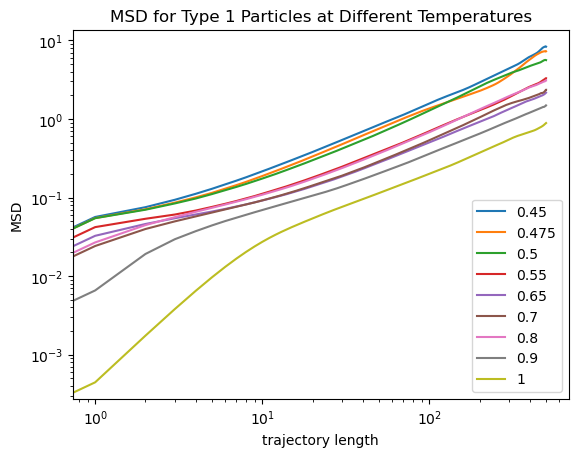

In [62]:
for i, data in enumerate(msd_vals):
    
    plt.loglog(data, label=f'{temps[i]}')

    plt.legend()
    plt.xlabel('trajectory length')
    plt.ylabel('MSD')
    plt.title('MSD for Type 1 Particles at Different Temperatures')


plt.show()

In [63]:
import numpy as np

msd1=[]
times=[]

for data in msd_vals:
    data = np.array(data)
    
    vals=[]
    for idx, val in enumerate(data):
        vals.append((val-1)**2)
        
    minposition = vals.index(min(vals))
    msd1.append(data[minposition])
    times.append(minposition)

ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

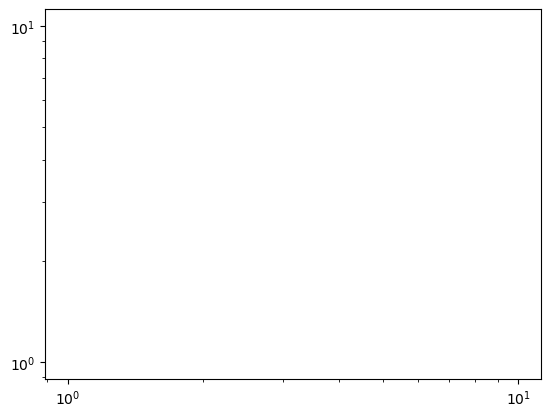

In [64]:
plt.loglog([1/t for t in temps], times)
plt.xlabel(r'$1/T$ (K$^{-1}$)', fontsize = 12)
plt.ylabel('Diffusion time (ps)', fontsize = 12)
plt.title('Diffusion time vs "+r"$1/T$', fontsize = 18)
plt.show()